## The First Bot: 6-Bot
This is my first AI, and the thinking is this: Every roll of the die carries the same risks, no matter how many times you have rolled so far this turn. So when the AI gets a good roll (i.e. a 6), it behooves it to bank that score, and not jeopardize it with another roll.

Bot mean: 45.4539 
Bot median: 43.0


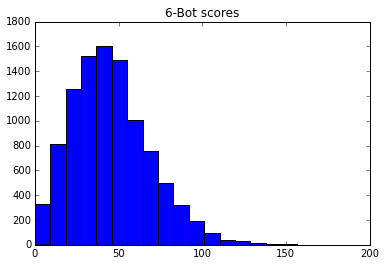

In [445]:
import random
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline


class Game:
    def __init__(self, limit, turn_score=0):
        self.turn_score = turn_score
        self.limit = limit
        
    def start_game(self):
        self.total_score = 0
        self.turn = 1
        self.start_turn()
        return self.total_score
    
    def start_turn(self):
        self.turn_score = 0
        roll = random.randint(1,6)
        #print("First roll: {}".format(roll))
        if roll == 1:
            self.end_turn()
        elif roll in self.limit:
            self.turn_score += roll
            self.end_turn()
        else:
            self.turn_score += roll
            self.roll_again()
        
    def roll_again(self):
        reroll = random.randint(1,6)
        #print("next roll: {} \nturn score: {}".format(reroll, self.turn_score))
        if reroll == 1:
            self.turn_score = 0
            self.end_turn()
        elif reroll in self.limit:
            self.turn_score += reroll
            self.end_turn()
        else:
            self.turn_score += reroll
            self.roll_again()
   
    def end_turn(self):
        if self.turn <= 7:
            self.turn += 1
            self.total_score += self.turn_score
            #print("At the end of round {}: \n{} points this round \n{} points total\n".format(self.turn, self.turn_score, self.total_score))
            self.start_turn()
        elif self.turn > 7:
            #print("Final score after 7 rounds: {}".format(self.total_score))
            #return Bot_Score.append(self.total_score)                      
            return self.total_score
        
def run_tests(a, trials=10000):
    final_scores = []
    for _ in range(trials):
        i = Game(a)
        final_scores.append(i.start_game())
    return final_scores

limit = [6]
a = run_tests(limit)
print("Bot mean: {} \nBot median: {}".format(np.mean(a), np.median(a)))
plt.hist(a, bins=20)
plt.title("6-Bot scores")
plt.show()

This histogram is not very helpful; an anomalous score clouds the results. Let's try this if for 10,000 runs, and discard the lowest and highest 1,000 scores:

Bot mean: 44.123 
Bot median: 43.0


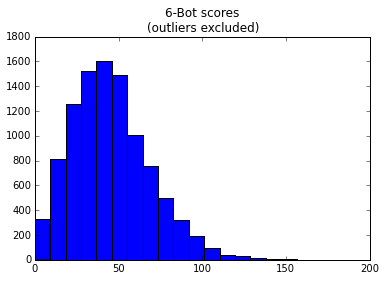

In [446]:
def run_tests(a, trials=10000):
    low = int(trials * 0.1)
    high = int(trials * 0.9)
    final_scores = []
    for _ in range(trials):
        i = Game(a)
        final_scores.append(i.start_game())
    final_scores = sorted(final_scores)
    return final_scores[low:high]

limit = [6]
x = run_tests(limit)
print("Bot mean: {} \nBot median: {}".format(np.mean(x), np.median(x)))
plt.hist(a, bins=20)
plt.title("6-Bot scores \n(outliers excluded)")
plt.show()

That brings the mean down much closer to the median, which is good. If the bot scores 500 points on a lucky game, it will have almost certainly won. There isn't any bonus for running up the score.

## The Second Bot: 5-6-Bot
This is the same as 6-Bot, but instead of banking it's points whenever a 6 is rolled, it will bank it's points whenever a 5 OR a 6 is rolled.

Bot mean: 39.381375 
Bot median: 39.0


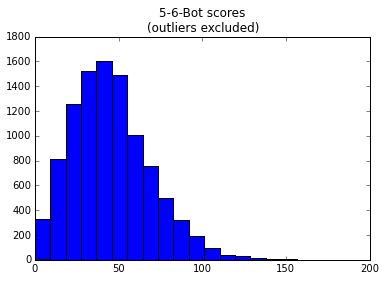

In [447]:
limit = [5, 6]
x = run_tests(limit)
print("Bot mean: {} \nBot median: {}".format(np.mean(x), np.median(x)))
plt.hist(a, bins=20)
plt.title("5-6-Bot scores \n(outliers excluded)")
plt.show()

Banking on a 5 or 6 looks a bit too conservative. 
Let's extend it further...

## 4-5-6-Bot

Bot mean: 32.645125 
Bot median: 33.0


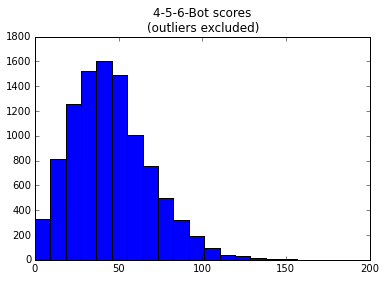

In [448]:
limit = [4, 5, 6]
x = run_tests(limit)
print("Bot mean: {} \nBot median: {}".format(np.mean(x), np.median(x)))
plt.hist(a, bins=20)
plt.title("4-5-6-Bot scores \n(outliers excluded)")
plt.show()

## 3-4-5-6-Bot

Bot mean: 27.607125 
Bot median: 28.0


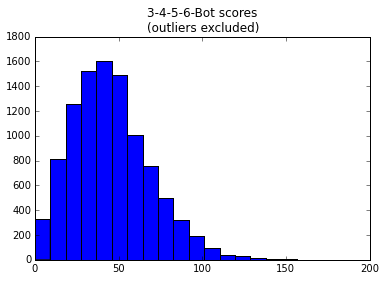

In [449]:
limit = [3, 4, 5, 6]
x = run_tests(limit)
print("Bot mean: {} \nBot median: {}".format(np.mean(x), np.median(x)))
plt.hist(a, bins=20)
plt.title("3-4-5-6-Bot scores \n(outliers excluded)")
plt.show()

## 2-3-4-5-6-Bot

Bot mean: 23.342125 
Bot median: 23.0


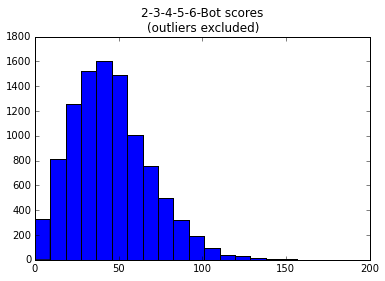

In [450]:
limit = [2, 3, 4, 5, 6]
x = run_tests(limit)
print("Bot mean: {} \nBot median: {}".format(np.mean(x), np.median(x)))
plt.hist(a, bins=20)
plt.title("2-3-4-5-6-Bot scores \n(outliers excluded)")
plt.show()

2-3-4-5-6-Bot uses a strategy of "only roll once per turn", and its average final score is 20. This makes sense because the average roll on any turn is (0+2+3+4+5+6)/6 = 3.333.

Multiplying by 7 rounds gives us 23.333. This shows that it is a reliable model. :-)

## Alternative Strategy: 
## Bank when turn score reaches N

For these bots, I set a target score per turn. Example: if the target score is 20, and the bot's score on the turn is 18, it will roll again. If it rolls a 5, it will bank those 23 points and end its turn.

This requires slightly modifying the original Game class, which looked at 

[0, 0, 0, 105, 53, 0, 54, 52, 53, 52, 0, 0, 52, 50, 0, 50, 53, 54, 0, 51]
Bot mean: 34.9542 
Bot median: 50.0


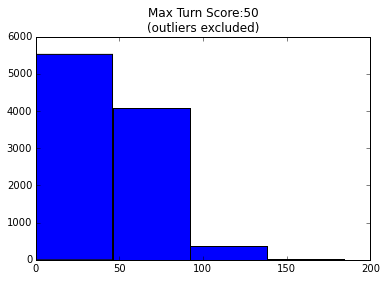

In [463]:
class GameTurnMax:
    def __init__(self, max_score, turn_score=0):
        self.turn_score = turn_score
        self.max_score = max_score
        
    def start_game(self):
        self.total_score = 0
        self.turn = 1
        self.roll_dice()
        return self.total_score
    
    def roll_dice(self):
        roll = random.randint(1,6)
        if roll == 1:
            self.turn_score = 0
            self.end_turn()
        else:
            self.turn_score += roll
            self.decide()
        
    def decide(self):
        if self.turn_score < self.max_score:
            self.roll_dice()
        elif self.turn_score >= self.max_score:
            self.end_turn()
            
    def end_turn(self):
        if self.turn <= 7:
            self.turn += 1
            self.total_score += self.turn_score
            self.turn_score = 0
            self.roll_dice()
        elif self.turn > 7:
            #print(self.total_score)
            return self.total_score
        
def run_max_tests(limit, trials=10000):
    low = int(trials * 0.1)
    high = int(trials * 0.9)
    final_scores = []
    for _ in range(trials):
        i = GameTurnMax(limit)
        final_scores.append(i.start_game())
    return final_scores

limit = 50
x = run_max_tests(limit)
print(run_max_tests(limit, trials=20))
print("Bot mean: {} \nBot median: {}".format(np.mean(x), np.median(x)))
plt.hist(a, bins=4)
plt.title("Max Turn Score:{} \n(outliers excluded)".format(limit))
plt.show()

### Something's wrong...
This histogram shows a majority of scores between 0 and 50. Presumably, they are all 0. (Scores between 1 and 49 should never happen). But the median is still 50.0.

Is this just something about how the bins are alocated?

[0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0]
Bot mean: 7.3673 
Bot median: 0.0


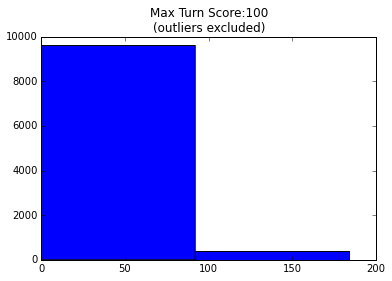

In [465]:
limit = 100
x = run_max_tests(limit)
print(run_max_tests(limit, trials=20))
print("Bot mean: {} \nBot median: {}".format(np.mean(x), np.median(x)))
plt.hist(a, bins=2)
plt.title("Max Turn Score:{} \n(outliers excluded)".format(limit))
plt.show()

[58, 75, 33, 54, 51, 50, 36, 33, 44, 67, 53, 33, 55, 25, 23, 46, 36, 32, 44, 52]
Bot mean: 47.9684 
Bot median: 48.0


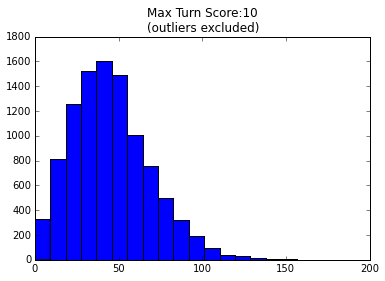

In [466]:
limit = 10
x = run_max_tests(limit)
print(run_max_tests(limit, trials=20))
print("Bot mean: {} \nBot median: {}".format(np.mean(x), np.median(x)))
plt.hist(a, bins=20)
plt.title("Max Turn Score:{} \n(outliers excluded)".format(limit))
plt.show()

## Comparison of Target Turn Scores
Setting the target turn score changes the distribution of final results scores. Let's try compare what the average result is for every possible target turn score.

[23.0, 24.0, 28.0, 31.0, 34.0, 39.0, 43.0, 44.0, 45.0, 48.0, 50.0, 52.0, 55.5, 51.0, 53.0, 55.0, 55.0, 58.0, 60.0, 62.0, 48.0, 49.0, 51.0, 52.0, 54.0, 55.0, 56.0, 58.0, 59.0, 61.0, 35.0, 36.0, 36.0, 37.0, 37.0, 38.0, 39.0, 40.0, 41.0, 41.0, 42.0, 43.0, 44.0, 45.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


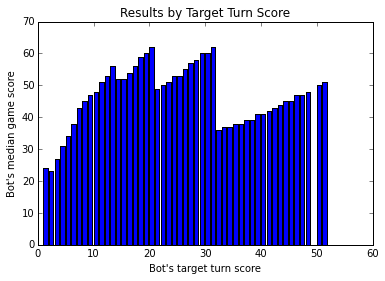

In [472]:
def run_tests_median(a, trials=1000):
    final_scores = []
    for _ in range(trials):
        i = GameTurnMax(a)
        final_scores.append(i.start_game())
    return np.median(final_scores)

def find_ideal_turn_score(max_hold):
    ave_performances = []
    for limit in range(1, max_hold):
        z = np.median(run_tests_median(limit))
        ave_performances.append(z)
    return ave_performances


print(find_ideal_turn_score(60))

plt.bar(range(1, 60), find_ideal_turn_score(60))
plt.title("Results by Target Turn Score".format(limit))
plt.xlabel("Bot's target turn score")
plt.ylabel("Bot's median game score")
plt.show()


This is very unexpected. I did not expect a completely normal distribution (e.g. setting the target turn score at 7 will usually require an entire additional roll than setting the target turn score at 6.) I cannot explain this distribution of scores, though.

One possibility? Each "sail" (group of ascending results followed by an immediate plunge) takes the same number of rolls per turn, on average.